## 1번. 체육복

In [ ]:
# 내 풀이
def solution(n, lost, reserve):
    reserve_new=list(filter(lambda x: x not in lost,reserve)) # lost와 겹치면 빌려줄 수 없으니 겹치는건 빼준다
    lost_new=list(filter(lambda x: x not in reserve,lost)) # 마찬가지로 겹치는건 빼준다
    answer=n-len(lost_new) # 일단 전체에서 잃어버린 사람들 수를 빼준다 
    for i in lost_new:
        if i-1 in reserve_new: # 잃어버린 사람 번호의 -1 이 두개 있는사람의 번호에 있다면 빌려 줄수 있으므로 answer에 1을 더해준다
            reserve_new.remove(i-1) # 빌려준 사람이 또 빌려줄순 없으므로 없애줌
            answer+=1
        elif i+1 in reserve_new:
            reserve_new.remove(i+1)
            answer+=1
    return answer

+ set을 쓰는것이 훨씬 더 좋음

In [ ]:
# 다른사람 풀이 참고해서 새로 만든것 (set으로 시간복잡도 줄이기)
def solution(n, lost, reserve):
    reserve_new=set(reserve)-set(lost)
    lost_new=set(lost)-set(reserve)
    answer=n-len(lost_new)
    for i in lost_new:
        a=i-1
        b=i+1
        if a in reserve_new:
            reserve_new=reserve_new-set([a])
            answer+=1
        elif b in reserve_new:
            reserve_new=reserve_new-set([b])
            answer+=1
    return answer

## 2번. 큰 수 만들기

최대한 그리디한 방법으로 만들려고 노력하다보니 아래와 같은 알고리즘을 만듬

+ 알고리즘(예시) - number = 234152 / k = 3 
    1. 234152 에서 3개가 삭제한다하면 남는건 3개
    2. 3개가 남아야 하면 뒤에 2개는 무조건 남아야하므로 앞의 [2341] 에서 가장 큰거 하나 선택 
    3. [4] 가 선택됐으면 4 뒤부터 [15](1개는 무조건 남아야하므로) 중 가장 큰거 선택
    4. [45]가 선택됐으면 ~~ 이런 식으로 진행

In [ ]:
# 내풀이
def solution(number, k):
    list_numb=list(map(int,list(number))) # number을 하나하나씩 나누어 리스트로 만듬
    index_max=-1 
    answer = ''
    remain=len(number)-k # 남아야 하는(제거되지 않아야하는) 숫자 개수
    while True:
        if remain==1:
            max_value=max(list_numb[index_max+1:])
            answer+=str(max_value)
            return answer
        else:
            max_value=max(list_numb[index_max+1:-remain+1])
            answer+=str(max_value)
            index_max=list_numb[index_max+1:-remain+1].index(max_value)+index_max+1
            remain-=1

+ 10번 테스트 시간초과

인터넷(다른 사람)에 다른 방식의 접근

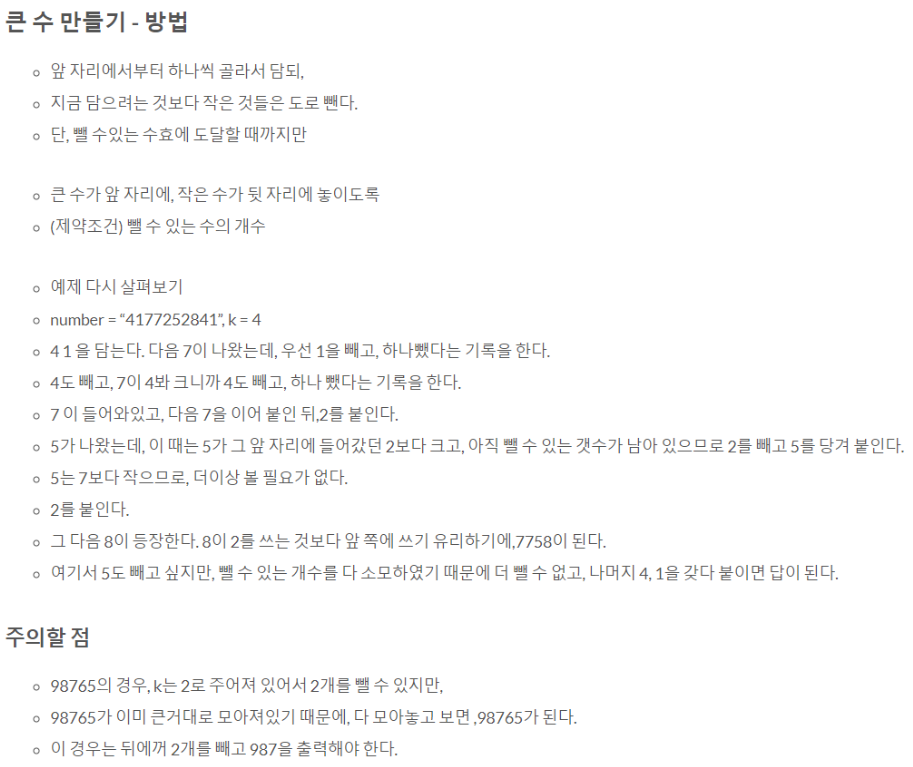

In [ ]:
# 다른 사람 풀이
def solution(number,k):
    collect=[]
    for i,num in enumerate(number):
        while len(collect)>0 and collect[-1]<num and k>0:
            k-=1
            collect.pop()
        if k==0:
            collect+=number[i:]
            break
        collect.append(num)
    collect = collect[:-k] if k > 0 else collect
    collect=''.join(collect)
    return collect

In [ ]:
# 다른 사람 풀이 2
def solution(number, k):
    stack = [number[0]]
    for num in number[1:]:
        while len(stack) > 0 and stack[-1] < num and k > 0:
            k -= 1
            stack.pop()
        stack.append(num)
    if k != 0:
        stack = stack[:-k]
    return ''.join(stack)

## 3번. 조이스틱

#### 마지막꺼 실패 뜸 

In [ ]:
import string
def solution(name):
    up_letters=list(string.ascii_uppercase) # ABCDEFGHIJKLMNOPQRSTUVWXYZ
    letters_number={j:i if i<14 else 26-i for i,j in enumerate(up_letters)} # 문자들을 숫자로 표현
    # {'A':0,'B':1,'C':2 ~~~~'M': 12, 'N': 13, 'O': 12, 'P': 11, 'Q': 10,'R': 9 ~~~~ ,'Z': 1}
    # n까지는 a에서 오른쪽으로 가든 뒤로 가든 13번 => N 이후로는 -1씩 해줌(아래(이전 알파벳)로 가면 되므로)
    name_list=list(name)
    name_numb=list(map(lambda x: letters_number[x],name_list)) # name을 전부 숫자(위(다음 알파벳) 또는 아래 누르는 횟수)로 바꿔줌
    answer=name_numb[0];x=1
    for i in range(1,len(name_numb)//2+1):
        if name_numb[i]==0:
            if not name_numb[-i]==0:
                x=-1       # 앞자리에서 연속된 'A'를 더 많이 가질때 맨끝으로 가서 마지막 문자부터 돌림
                break
    if x==1:
        for i in range(1,len(name_numb)):
            answer+=name_numb[i] # ANSWER에 숫자(횟수)를 더함
            if sum(name_numb[i:])==0: # 'SSSAAA'를 예시로 들면 4번째 A가 나오면 Break(수행을 멈추고 벗어남)
                return answer
            answer+=1 # 오른쪽으로 이동하면서 +1
    else: # X == -1 일때
        for i in range(-1,-len(name_numb)+1,-1): # 거꾸로 돌기때문에 -1 에서 1씩 빼주면서 거꾸로 수행됨
            answer=answer+name_numb[i]+1 # answer에 숫자(횟수)를 더함 + 왼쪽으로 이동하면서(+1)
            if sum(name_numb[1:i])==0: # 'SAAASS'를 예시로 들면 -3번째가 A가 나오면 Break(수행을 멈추고 벗어남)
                return answer
    return answer

+ 마지막 테스트 실패 why???

In [1]:
import string
up_letters=list(string.ascii_uppercase)
letters_number={j:i if i<14 else 26-i for i,j in enumerate(up_letters)}
letters_number

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 12,
 'P': 11,
 'Q': 10,
 'R': 9,
 'S': 8,
 'T': 7,
 'U': 6,
 'V': 5,
 'W': 4,
 'X': 3,
 'Y': 2,
 'Z': 1}

In [2]:
ex='JEROEN'
ex_list=list(ex)
ex_numb=list(map(lambda x: letters_number[x],ex_list))
ex_numb

[9, 4, 9, 12, 4, 13]

## 4번. 구명조끼

In [ ]:
# 첫번째 풀이 (틀린 풀이)
import heapq
def solution(people, limit):
    heapq.heapify(people)
    answer = 1
    total_weight=0
    for i in range(len(people)):
        person=heapq.heappop(people)
        if total_weight+person<=limit:
            total_weight+=person
        else:
            total_weight=person
            answer+=1
    return answer

In [ ]:
solution([90,90,40,40,100],180) # 이런 경우 잘못된 결과를 냄

2명 제한이 관건!!(문제 잘 보기)

In [ ]:
# 두번째 풀이
def solution(people, limit):
    people.sort()
    answer = 0;i=0;j=1
    while True:
        total_weight=people[-j]
        j+=1
        answer+=1
        if len(people)==i+j-1:
            return answer
        if people[i]+total_weight<=limit:
            i+=1
        if len(people)==i+j-1:
            return answer

+ 너무 난잡하다 if len(people)==i+j-1을 두번 넣는 경우 말고 다른 방법 없는지 확인해보기

+ 가장 큰 사람과 가장 작은 사람이 탈수 있으면 보내면 됨 (가장 큰 사람과 그 다음 큰 사람을 태워보내는거나 가장 큰 사람과 가장 작은 사람을 태워보내는것이랑 같음) => 이게 굉장히 중요한 포인트!!!(머릿속으론 잘 이해가 안됨)

#### remove 이런건 오래걸림 => 인덱스를 활용해서 풀수 잇다면 인덱스 쓰기

In [ ]:
# 다른 사람 풀이
def solution(people, limit) :
    answer = 0
    people.sort()
    a = 0
    b = len(people) - 1
    while a < b :
        if people[b] + people[a] <= limit :
            a += 1
            answer += 1
        b -= 1
    return len(people) - answer

+ 마지막에 왜 len(people) - answer 인가?